NAME: -SHRIYA REDDY PONNALA

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
data


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


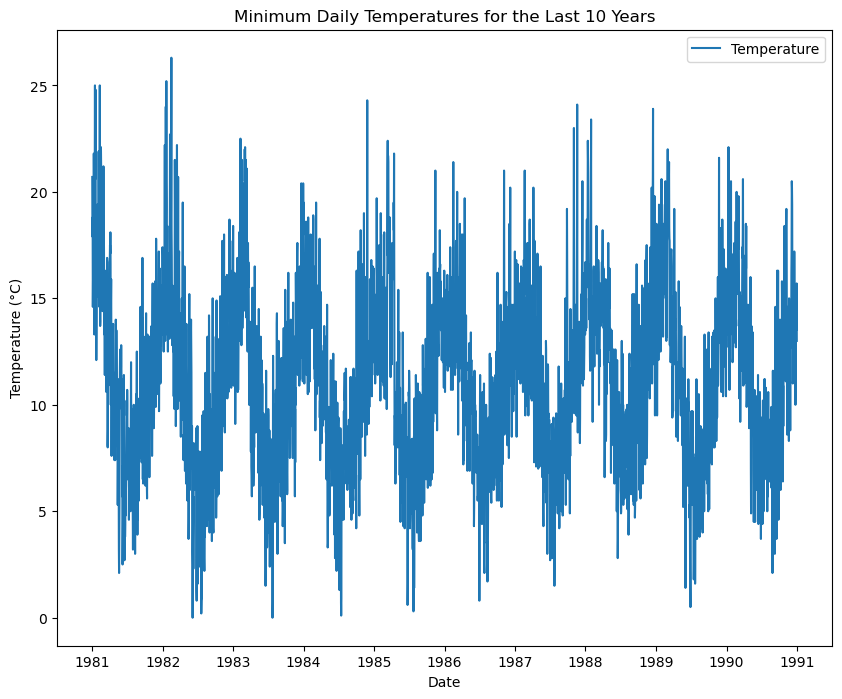

In [95]:
# Visualize the data
plt.figure(figsize=(10, 8))
plt.plot(data.index, data['Temp'], label='Temperature')
plt.title('Minimum Daily Temperatures for the Last 10 Years')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [96]:
#Checking for any missing data
print(data.isna().sum())
print(data.isnull().sum())

Temp    0
dtype: int64
Temp    0
dtype: int64


In [97]:
data2 = data['Temp'].to_numpy()

In [98]:
len(data2)

3650

In [99]:
# Split data into training and testing sets
trainData_size = int(len(x) * 0.8)
x_trainData, x_testData = x[:trainData_size], x[trainData_size:]
y_trainData, y_testData = y[:trainData_size], y[trainData_size:]

In [100]:
# Data preprocessing
scaler = MinMaxScaler(feature_range=(-1, 1))
x_trainData = scaler.fit_transform(x_trainData.reshape(-1, 1))
x_testData = scaler.transform(x_testData.reshape(-1, 1))

In [101]:
y_trainData = x_trainData[1:]
x_trainData = x_trainData[:-1]

y_testData = x_testData[1:]
x_testData = x_testData[:-1]

In [102]:
# Build the model
model1 = Sequential()
model1.add(Dense(10, activation='relu', input_dim=1))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
# Train the model
history = model1.fit(x_trainData, y_trainData, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
29119/29119 [==============================] - 8s 272us/step - loss: 0.0332
Epoch 2/100
29119/29119 [==============================] - 8s 270us/step - loss: 0.0325
Epoch 3/100
29119/29119 [==============================] - 8s 272us/step - loss: 0.0324
Epoch 4/100
29119/29119 [==============================] - 8s 269us/step - loss: 0.0323
Epoch 5/100
29119/29119 [==============================] - 8s 264us/step - loss: 0.0325
Epoch 6/100
29119/29119 [==============================] - 8s 265us/step - loss: 0.0324
Epoch 6: early stopping


In [103]:
# Make predictions
y_trainData_prediction = model1.predict(x_trainData)
y_testData_prediction = model1.predict(x_testData)

228/228 [==============================] - 0s 235us/step


In [104]:
# Inverse transform the predictions
y_trainData_prediction_inverse = scaler.inverse_transform(y_trainData_prediction)
y_testData_prediction_inverse = scaler.inverse_transform(y_testData_prediction)
y_trainData_true_inverse = scaler.inverse_transform(y_trainData)
y_testData_true_inverse = scaler.inverse_transform(y_testData)

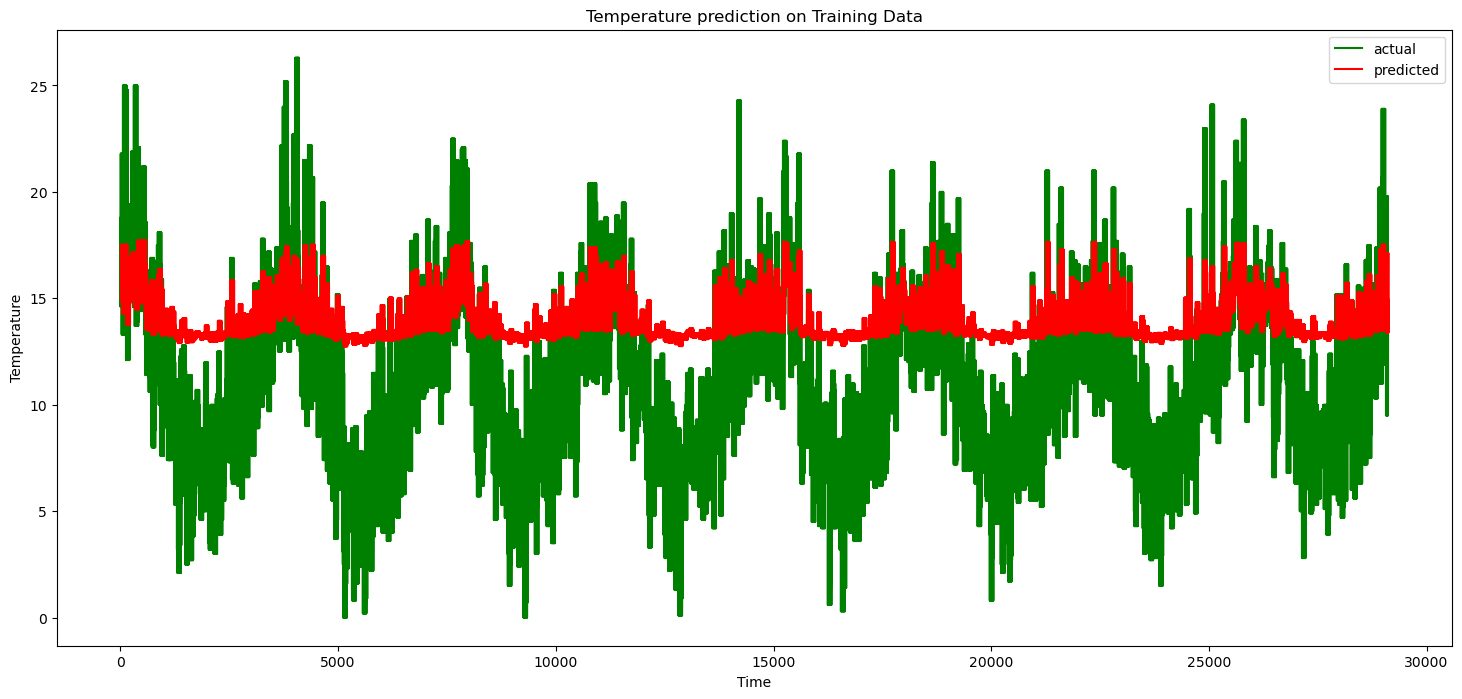

In [105]:
# Plot the training results
plt.figure(figsize=(18, 8))

plt.plot(np.arange(0, len(y_trainData_true_inverse)), y_trainData_true_inverse, 'g', label="actual")
plt.plot(np.arange(input_length, len(y_trainData_prediction_inverse) + input_length), y_trainData_prediction_inverse, 'r', label="predicted")

plt.title("Temperature prediction on Training Data")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()

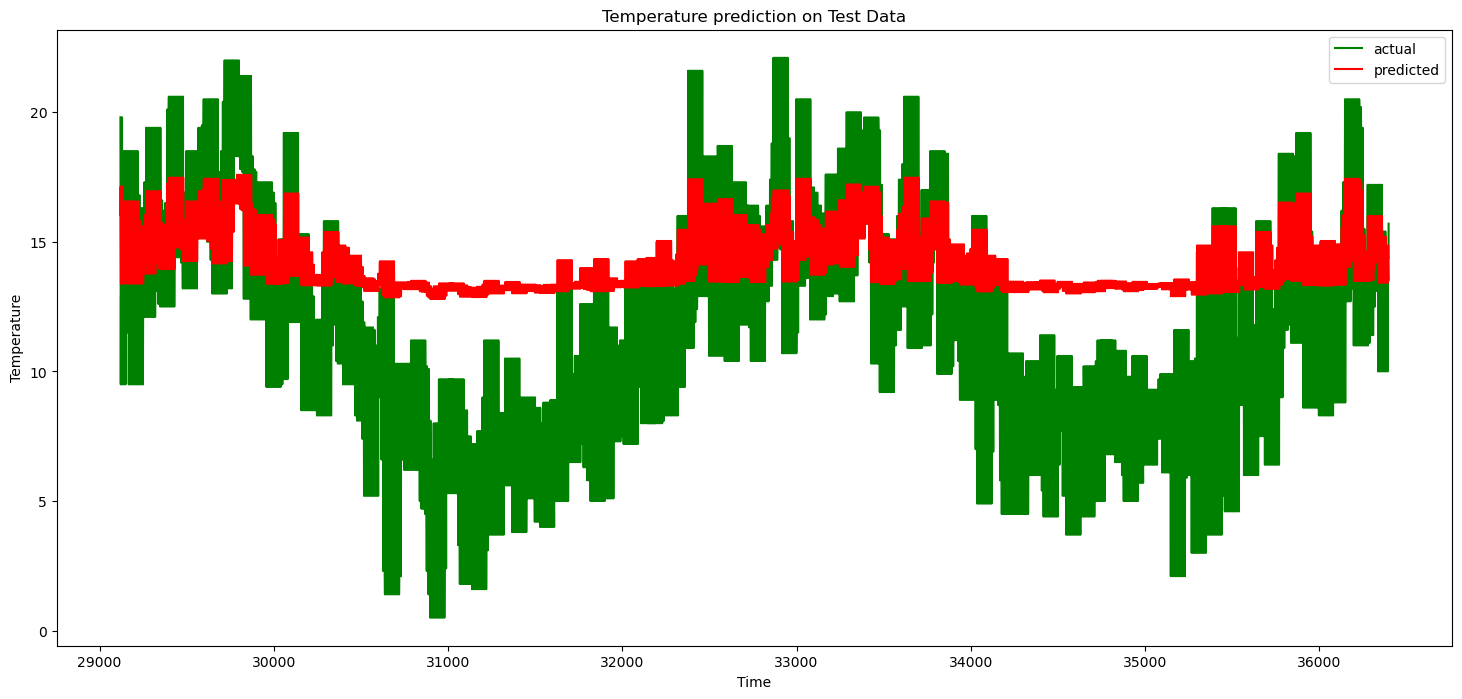

In [106]:
# Plot the test results

plt.figure(figsize=(18, 8))

plt.plot(np.arange(len(y_trainData_true_inverse) + 1, len(y_trainData_true_inverse) + 1 + len(y_testData_prediction_inverse)), y_testData_true_inverse, 'g', label="actual")
plt.plot(np.arange(len(y_trainData_true_inverse) + 1, len(y_trainData_true_inverse) + 1 + len(y_testData_prediction_inverse)),
         y_testData_prediction_inverse, 'r', label="predicted")
plt.title("Temperature prediction on Test Data")
plt.xlabel("Time")
plt.ylabel("Temperature")

plt.legend()

plt.show()

In [107]:
# Training and Testing error for using Multilayer Neural Network 
print(f"Mean Absolute Error on training data is {MAE(y_trainData_true_inverse,y_trainData_prediction_inverse)}")
print(f"Root Mean Squared Error on training data is {MSE(y_trainData_true_inverse,y_trainData_prediction_inverse)**0.5}")

Mean Absolute Error on training data is 3.6567046313729765
Root Mean Squared Error on training data is 4.503492169960039


#  Multilayer Recurrent Neural Network

In [108]:
# Data preprocessing
x_trainData = x_trainData.reshape(x_trainData.shape[0], 1, 1)
x_testData = x_testData.reshape(x_testData.shape[0], 1, 1)

In [109]:
# Build the model
model2 = Sequential()
model2.add(LSTM(50, input_shape=(1,x_trainData.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='loss', patience=2, verbose=1)
# Train the model
history_lstm = model2.fit(x_trainData, y_trainData, epochs=100, verbose=1, shuffle=False, callbacks=[early_stopping])



Epoch 1/100
910/910 [==============================] - 1s 487us/step - loss: 0.0499
Epoch 2/100
910/910 [==============================] - 0s 474us/step - loss: 0.0440
Epoch 3/100
910/910 [==============================] - 0s 473us/step - loss: 0.0440
Epoch 4/100
910/910 [==============================] - 0s 473us/step - loss: 0.0439
Epoch 5/100
910/910 [==============================] - 0s 472us/step - loss: 0.0439
Epoch 6/100
910/910 [==============================] - 0s 473us/step - loss: 0.0439
Epoch 7/100
910/910 [==============================] - 0s 472us/step - loss: 0.0438
Epoch 8/100
910/910 [==============================] - 0s 475us/step - loss: 0.0438
Epoch 9/100
910/910 [==============================] - 0s 477us/step - loss: 0.0438
Epoch 10/100
910/910 [==============================] - 0s 477us/step - loss: 0.0437
Epoch 11/100
910/910 [==============================] - 0s 473us/step - loss: 0.0437
Epoch 12/100
910/910 [==============================] - 0s 474us/step - lo

In [110]:
# Make predictions
y_trainData_prediction = model2.predict(x_trainData)
y_testData_prediction = model2.predict(x_testData)

228/228 [==============================] - 0s 314us/step


In [111]:
# Inverse transform the predictions
y_trainData_prediction_inverse = scaler.inverse_transform(y_trainData_prediction)
y_testData_prediction_inverse = scaler.inverse_transform(y_testData_prediction)
y_trainData_true_inverse = scaler.inverse_transform(y_trainData)
y_testData_true_inverse = scaler.inverse_transform(y_testData)

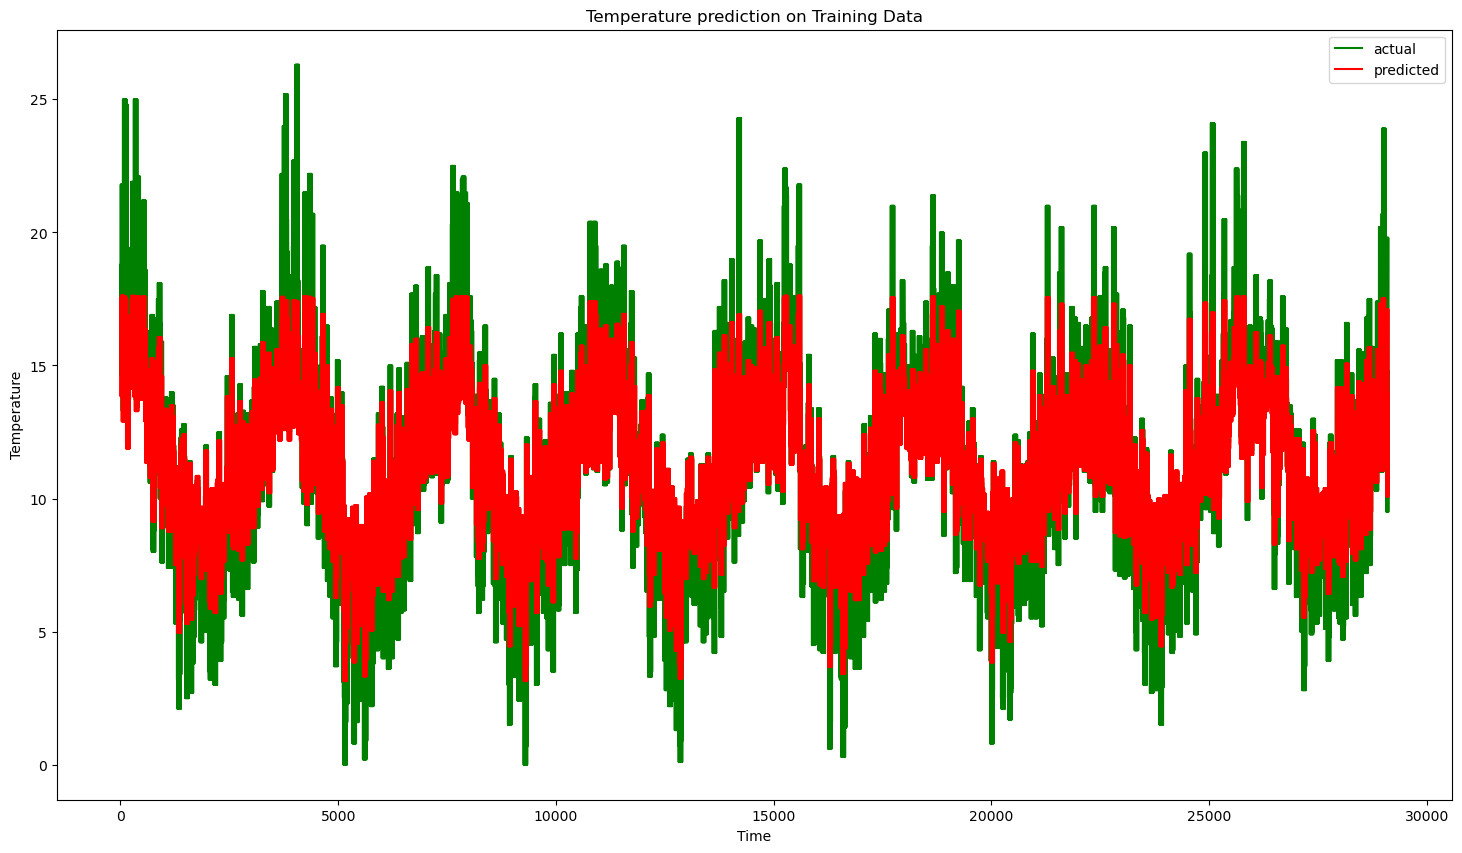

In [112]:
# Plot the training results
plt.figure(figsize=(18, 10))

plt.plot(np.arange(0, len(y_trainData_true_inverse)), y_trainData_true_inverse, 'g', label="actual")
plt.plot(np.arange(1, len(y_trainData_prediction_inverse) + 1), y_trainData_prediction_inverse, 'r', label="predicted")

plt.title("Temperature prediction on Training Data")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()

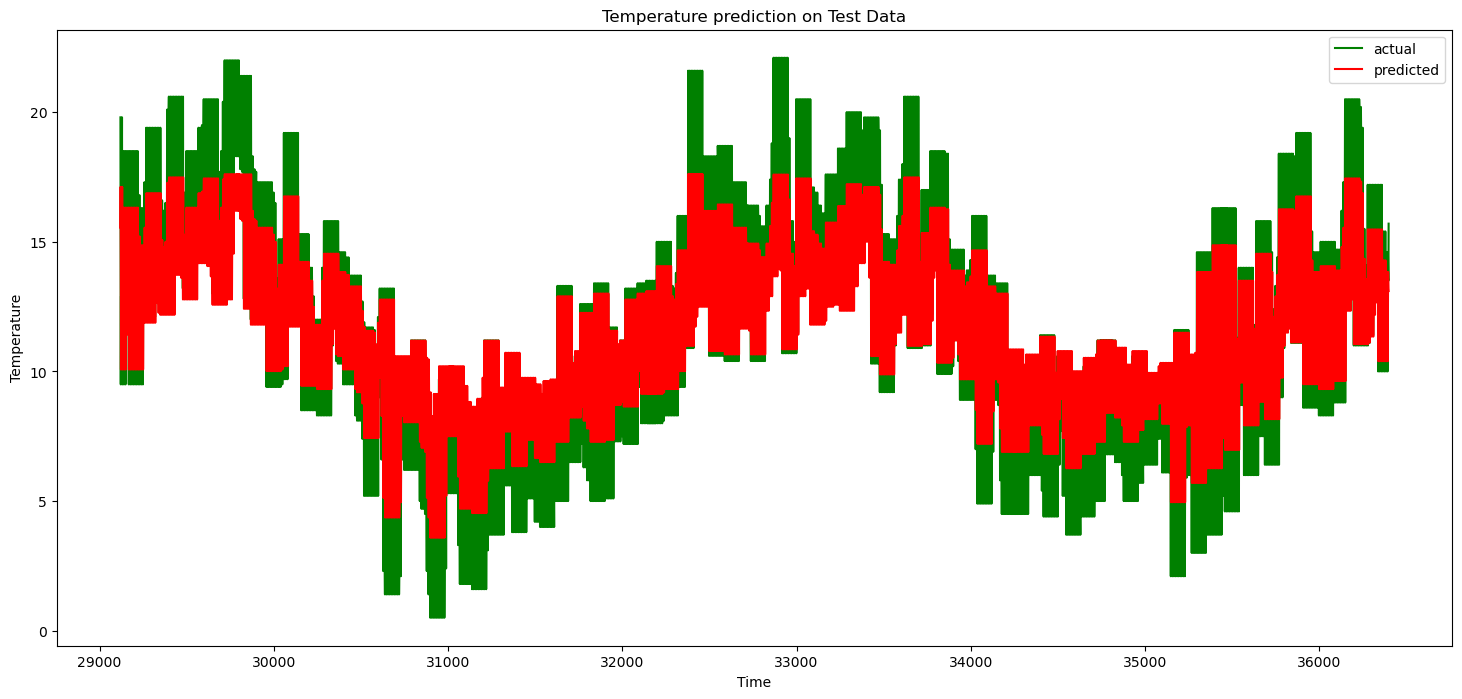

In [113]:
# Plot the test results

plt.figure(figsize=(18, 8))

plt.plot(np.arange(len(y_trainData_true_inverse) + 1, len(y_trainData_true_inverse) + 1 + len(y_testData_prediction_inverse)), y_testData_true_inverse, 'g', label="actual")
plt.plot(np.arange(len(y_trainData_true_inverse) + 1, len(y_trainData_true_inverse) + 1 + len(y_testData_prediction_inverse)),
         y_testData_prediction_inverse, 'r', label="predicted")
plt.title("Temperature prediction on Test Data")
plt.xlabel("Time")
plt.ylabel("Temperature")

plt.legend()

plt.show()

In [114]:
# Training and Testing error for using Multilayer Neural Network 
print(f"Mean Absolute Error on training data is {MAE(y_trainData_true_inverse,y_trainData_prediction_inverse)}")
print(f"Root Mean Squared Error on training data is {MSE(y_trainData_true_inverse,y_trainData_prediction_inverse)**0.5}")

Mean Absolute Error on training data is 2.111846918227716
Root Mean Squared Error on training data is 2.721168737649543


In [115]:
mnn_prediction = [x_testData[-1:]]
for i in range(100):
    # Ensure that mnn_prediction[i] has at least two dimensions
    if mnn_prediction[i].ndim < 2:
        mnn_prediction[i] = np.expand_dims(mnn_prediction[i], axis=0)

    # Predict the next value
    prediction = model1.predict(mnn_prediction[i])

    # Append the prediction to the sequence
    mnn_prediction.append(prediction)

# Extract the actual values from the predictions
mnn_prediction_values = scaler.inverse_transform(np.array(mnn_prediction).reshape(-1, 1))



1/1 [==============================] - 0s 7ms/step


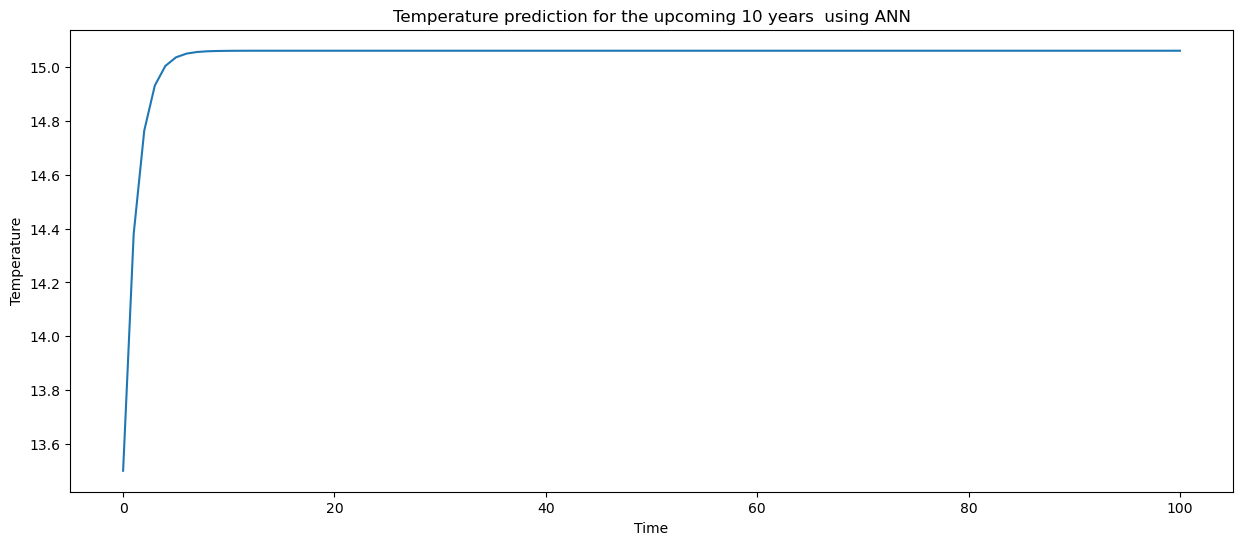

In [116]:
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(np.array(mnn_prediction).reshape(-1,1)))
plt.title("Temperature prediction for the upcoming 10 years  using ANN")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

In [117]:
prediction_lmse = x_testData[-1:]
pred = []
for i in range(3660):
    print(i)
    temp = model2.predict(np.array(prediction_lmse).reshape(1,-1,1))
    prediction_lmse = np.append(prediction_lmse,temp)
    pred.append(temp)

0
1/1 [==============================] - 0s 8ms/step
1
1/1 [==============================] - 0s 59ms/step
2
1/1 [==============================] - 0s 7ms/step
3
1/1 [==============================] - 0s 8ms/step
4
1/1 [==============================] - 0s 9ms/step
5
1/1 [==============================] - 0s 7ms/step
6
1/1 [==============================] - 0s 8ms/step
7
1/1 [==============================] - 0s 7ms/step
8
1/1 [==============================] - 0s 7ms/step
9
1/1 [==============================] - 0s 7ms/step
10
1/1 [==============================] - 0s 7ms/step
11
1/1 [==============================] - 0s 8ms/step
12
1/1 [==============================] - 0s 8ms/step
13
1/1 [==============================] - 0s 7ms/step
14
1/1 [==============================] - 0s 7ms/step
15
1/1 [==============================] - 0s 7ms/step
16
1/1 [==============================] - 0s 7ms/step
17
1/1 [==============================] - 0s 7ms/step
18
1/1 [=============================

/Users/PC/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:548: RuntimeWarning: overflow encountered in divide
  X /= self.scale_


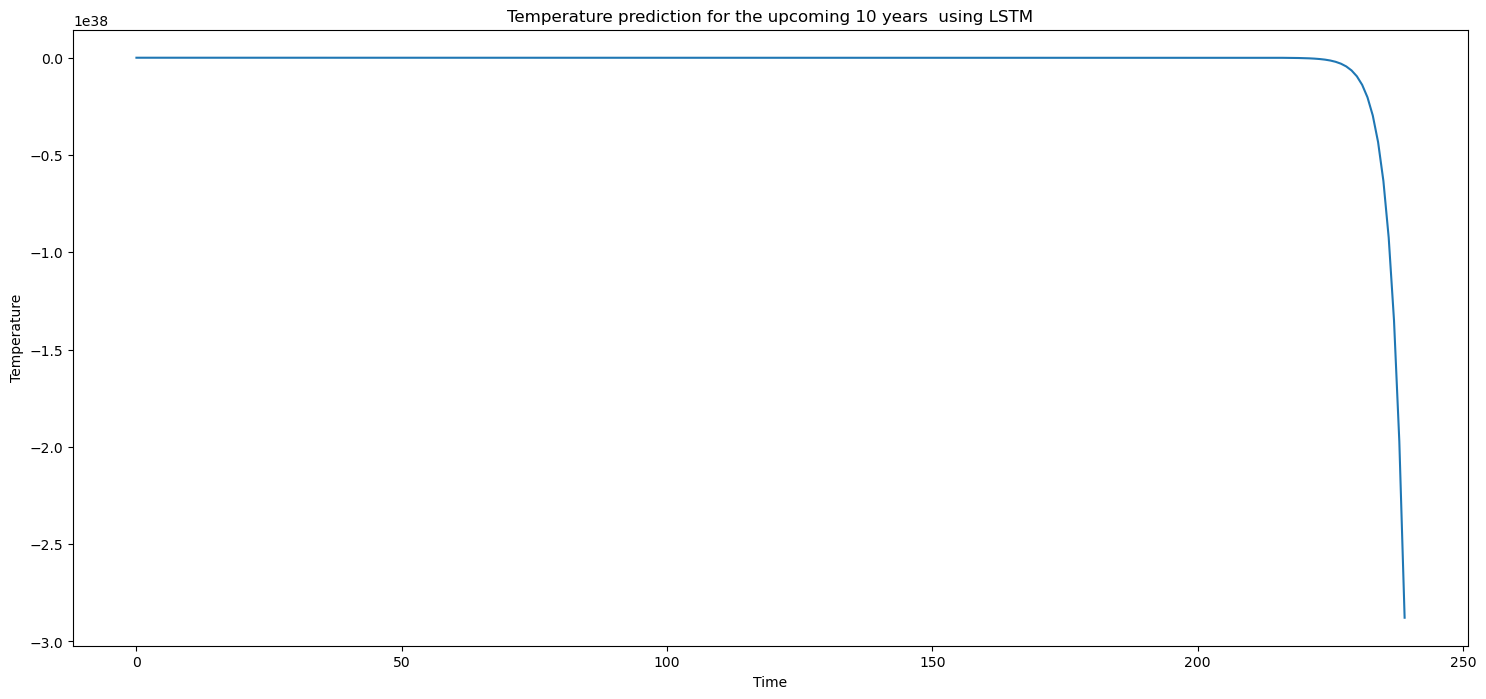

In [118]:
plt.figure(figsize=(18, 8))
plt.plot(scaler.inverse_transform(np.array(pred).reshape(-1,1)))
plt.title("Temperature prediction for the upcoming 10 years  using LSTM")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

Explanation: -
Recurrent Neural Networks (RNNs) are frequently thought to be superior to simple Artificial Neural Networks (ANNs) for time series forecasting due to their ability to grasp temporal dependencies and sequential patterns inherent in time series data. RNNs are specifically intended to handle sequences and time-dependent data. They keep concealed states that save information from past time steps, allowing them to assess the data's temporal order.

RNNs can manage sequences of changing lengths, which is critical for time series forecasting when the number of observations changes over time.Time series data frequently reveals patterns and trends that necessitate contextual knowledge. RNNs are designed to capture context and relationships between data points, making them suited for tasks where the order of the data is important.

Hence,From the MAE and MSE values our hypothesis states that the RNN model performs better the ANN model .